In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('uber-raw-data-sep14.csv' )

In [6]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'] ,dayfirst=True)

In [7]:
df.to_csv('Modded.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028136 entries, 0 to 1028135
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   Date/Time  1028136 non-null  datetime64[ns]
 1   Lat        1028136 non-null  float64       
 2   Lon        1028136 non-null  float64       
 3   Base       1028136 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 31.4+ MB


In [9]:
# Checking for null values
df.isnull().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [10]:
df['Base']

0          B02512
1          B02512
2          B02512
3          B02512
4          B02512
            ...  
1028131    B02764
1028132    B02764
1028133    B02764
1028134    B02764
1028135    B02764
Name: Base, Length: 1028136, dtype: object

In [11]:
len(df)

1028136

In [12]:
# df['DayOfWeek'][:50]

In [13]:
df['Hour'] = df['Date/Time'].map(lambda x:x.hour)

In [14]:
df['Day'] = df['Date/Time'].map(lambda x:x.day)

In [15]:
df['DayOfWeek'] = df['Date/Time'].map(lambda x:x.dayofweek)

In [16]:
dict_dayweek = {0:'Sunday' ,1:'Monday' ,2:'Tuesday' ,3:'Wednesday' ,4:'Thursday' ,5:'Friday' ,6:'Saturday'}

In [17]:
df['DayOfWeek'] = df['DayOfWeek'].map(dict_dayweek)

In [18]:
df['DayOfWeek'].unique()

array(['Wednesday', 'Saturday', 'Tuesday', 'Thursday', 'Sunday', 'Friday',
       'Monday'], dtype=object)

C:\Users\Chirag\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hour', ylabel='count'>

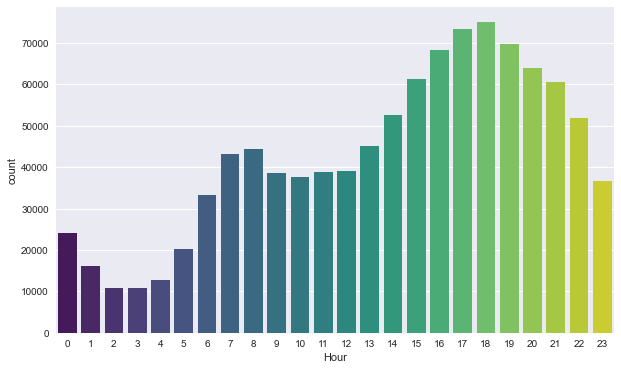

In [19]:
# Number of uber request per hour, each hour of the day.
plt.figure(figsize=(10,6))
plt.style.use('seaborn')
sns.countplot(df['Hour'] ,palette='viridis')

C:\Users\Chirag\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Day', ylabel='count'>

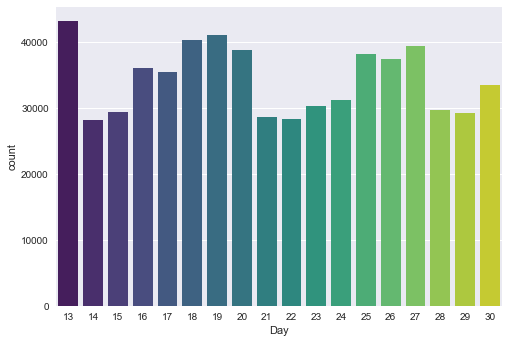

In [20]:
# Number of uber request per hour, each day.
sns.countplot(df['Day'][df['Day']!=9] ,palette='viridis')

In [21]:
order=['Sunday' , 'Monday' ,'Tuesday' ,'Wednesday' ,'Thursday','Friday','Saturday']

C:\Users\Chirag\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hour', ylabel='count'>

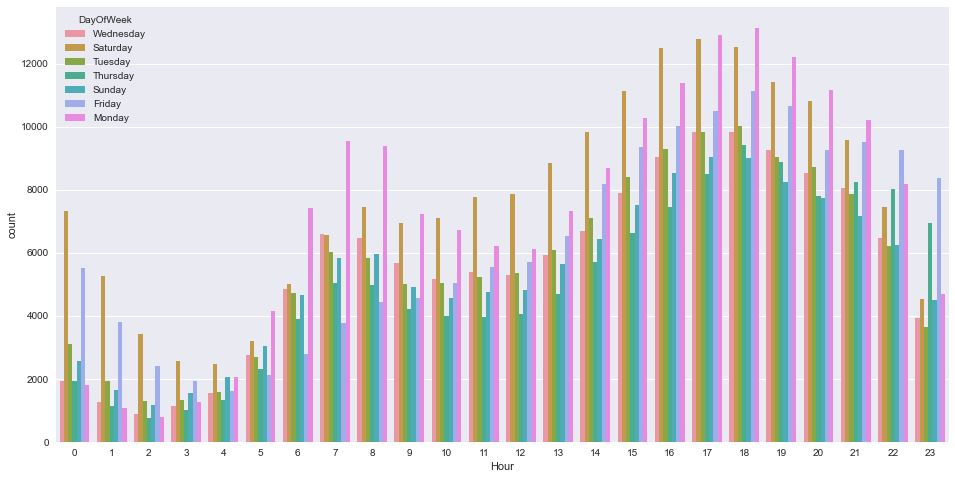

In [28]:
plt.figure(figsize=(16,8))
sns.countplot(df['Hour'] ,hue=df['DayOfWeek'])  # I guess I've got the numbering of the days of week wrong.

<AxesSubplot:xlabel='Day', ylabel='Hour'>

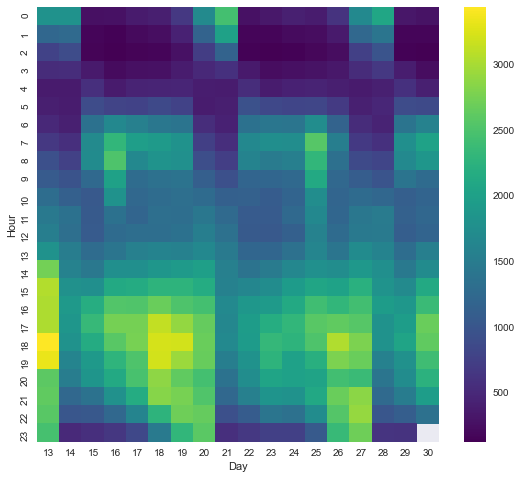

In [29]:
# Generating a heat-map from the pivot table

plt.figure(figsize=(9,8))
sns.heatmap(df[df['Day']!=9].pivot_table(index='Hour' ,columns = 'Day' ,aggfunc = 'count')['Base'] , cmap='viridis')

In [98]:
df.head(7)

,Date/Time,Lat,Lon,Base,Hour,Day,DayOfWeek
0,2014-01-09 00:01:00,40.2201,-74.0021,B02512,0,9,Wednesday
1,2014-01-09 00:01:00,40.7500,-74.0027,B02512,0,9,Wednesday
2,2014-01-09 00:03:00,40.7559,-73.9864,B02512,0,9,Wednesday
3,2014-01-09 00:06:00,40.7450,-73.9889,B02512,0,9,Wednesday
4,2014-01-09 00:11:00,40.8145,-73.9444,B02512,0,9,Wednesday
5,2014-01-09 00:12:00,40.6735,-73.9918,B02512,0,9,Wednesday
6,2014-01-09 00:15:00,40.7471,-73.6472,B02512,0,9,Wednesday


In [109]:
df['Lon'].max()

-72.7163

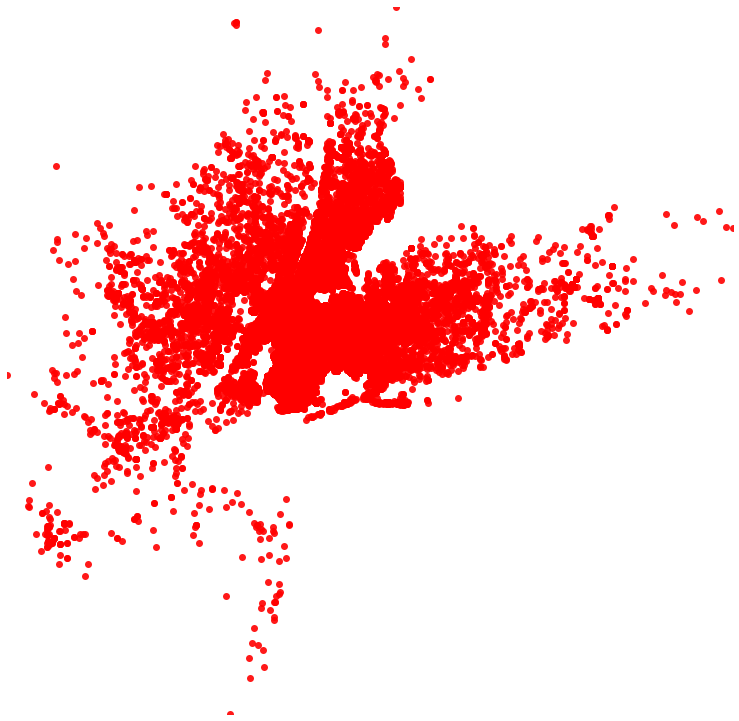

In [114]:
# Trying to plot the scatter plot of latitude and longitude of each uber request, hoping to get the map of the area, 
# however it doesn't look so good 😅

plt.figure(figsize=(13,13))
plt.ylim((39.9897 ,41.3476))
plt.xlim((-74.7736 ,-72.7163))
plt.axis('off')
sns.scatterplot(x='Lon' ,y='Lat' ,data=df , color='red' ,linewidth = 0 ,alpha=0.9)